__Tutorial 1: Linear Regression with Mean-Squared Error (MSE)__
***
In this tutorial, we consider the case of univariate linear regression by minimizing the mean-squared error (MSE).

By minimizing the mean-squared error (MSE), we view our model as a function without and attempt to fit that model by minimizing the error due to the observed noise. In the univariate case (single input variable $x$), our model is:
$$
y_{measured} = f(x;\theta)
$$
Thus in the univariate linear case, we have
$$
y = \theta x
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

First, toy data is randomly generated and plotted below. We consider the case of a single input variable $x$ with corresponding measurement $y$.

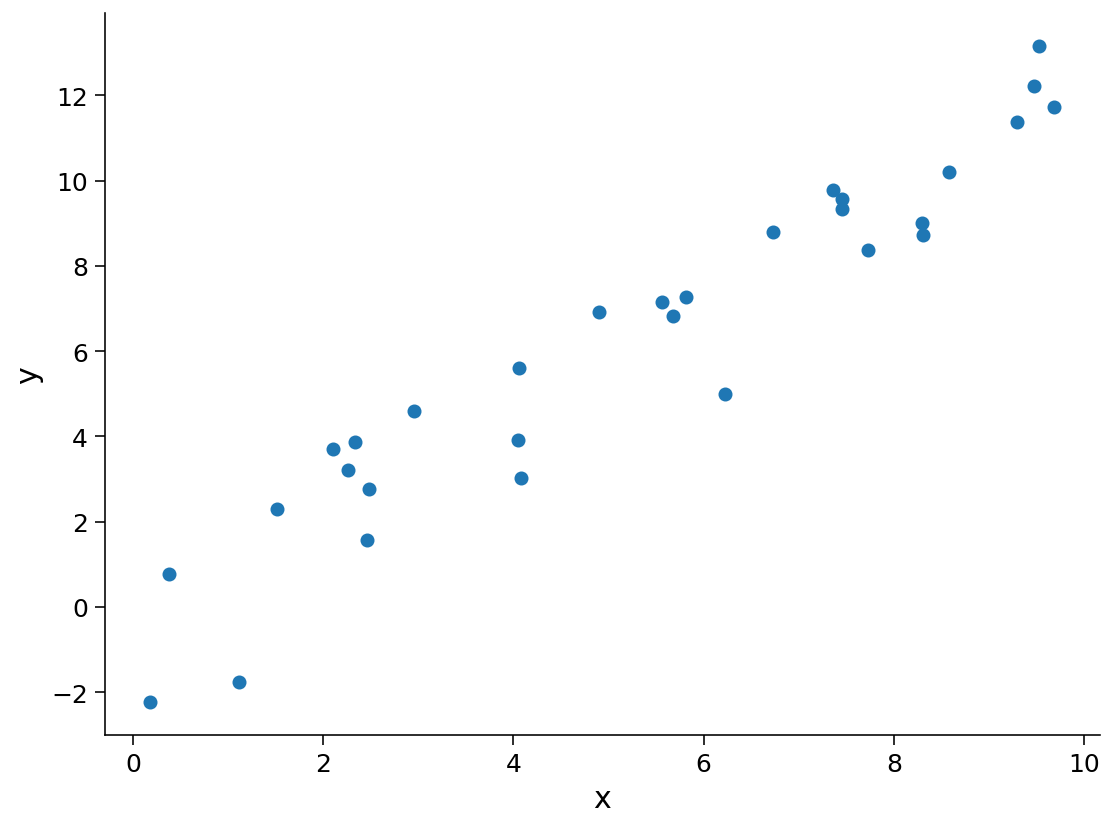

In [8]:
# Generate some simulated data
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Where $N$ is the total number of measurements and $\hat{\theta}$ is our estimation of the slope for the linear regression, the mean-squared error is defined as:
$$
MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{\theta} x_i)^2
$$
A function to compute the mean-squared error is defined below. A plotting function for visualizing MSE is also defined, and multiple estimations of the slope are explored.

In [10]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """

  # Compute the estimated y
  y_hat = theta_hat * x

  # Compute mean squared error
  mse = np.mean((y - y_hat) ** 2)

  return mse

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

# Visulize MSE for various estimations of theta

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

If we consider the vector of all values of $x$, $\boldsymbol{x}$, and the vector of all corresponding values of $y$, $\boldsymbol{y}$, then the vector that minimizes the residuals is the projection of $\boldsymbol{y}$ along $\boldsymbol{x}$. 
$$
\frac{\boldsymbol{x}^T \boldsymbol{y}}{\boldsymbol{x}^T\boldsymbol{x}} \boldsymbol{x}
$$
In this case, $\hat{\theta} = \frac{\boldsymbol{x}^T \boldsymbol{y}}{\boldsymbol{x}^T\boldsymbol{x}}$ The analytical solution to minimize MSE is defined below.

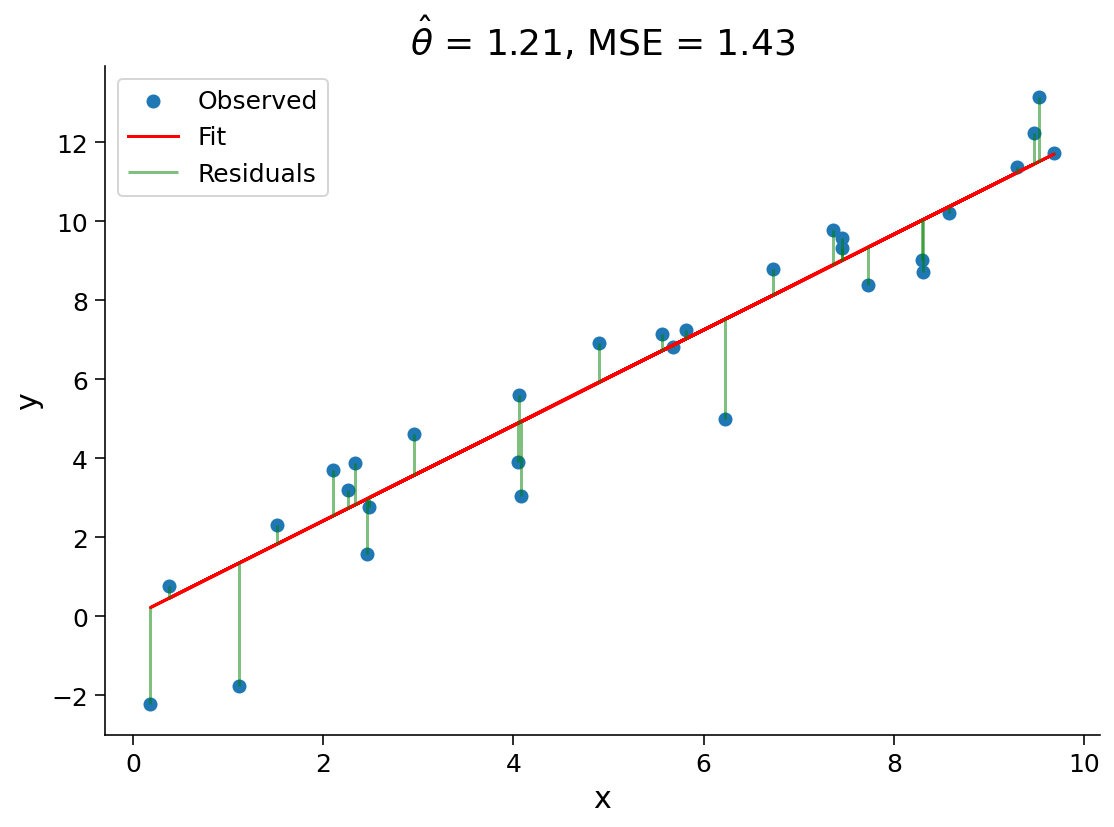

In [7]:
# Solving for least-squares optimization analytically

def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (x.T @ y) / (x.T @ x)

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)